<h1>Logistic Regression</h1>

<p>In this guide, i will be applying logistic regression to Social Network Ads Dataset to predict if user will made the purchase or not?</p>

<hr />
<ol>
	<li><strong>Importing required&nbsp;Libraries and Modules</strong></li>
	<li><strong>Filter warnings to prevent warning to appear in the notebook, in any case</strong></li>
</ol>


In [3]:
import warnings
import pandas as pd
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<h3>Importing Dataset to Pandas Dataframe</h3>


In [4]:
dframe = pd.read_csv("Social_Network_Ads.csv")
dframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<h3>Checking Correlation of non-categorical dataset variables</h3>


In [5]:
dframe.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<h3>Encoding Gender column Lables to numerical data</h3>


In [6]:
lbl_encoder = LabelEncoder()
dframe["GenderEncoded"] = lbl_encoder.fit_transform(dframe.Gender)

In [7]:
dframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,GenderEncoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


<h3>Generating Dataframe for training data</h3>

<hr />
<p>Here, i am omitting the following columns from training dataset:</p>

<table align="left" border="1" cellpadding="1" cellspacing="1" style="width:500px">
	<thead>
		<tr>
			<th scope="col">Gender</th>
			<th scope="col">Purchased</th>
			<th scope="col">User ID</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>Already Encoded to GenderEncoded</td>
			<td>Not a part of Training Data</td>
			<td>No relevacny in training</td>
		</tr>
	</tbody>
</table>


In [8]:
x_dframe = dframe.drop(["Gender", "Purchased", "User ID"], axis=1)
x_dframe.head()

,Age,EstimatedSalary,GenderEncoded
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


<h3>Splitting Training and Test Data</h3>


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_dframe, dframe.Purchased, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


<h3>Scaling Age and Estimated Salary variables by Standard Scaler</h3>


In [10]:
std_scaler_age = StandardScaler()
x_train.Age = std_scaler_age.fit_transform(x_train.Age)

std_scaler_salary = StandardScaler()
x_train.EstimatedSalary = std_scaler_salary.fit_transform(x_train.EstimatedSalary)
print(x_train.shape)
print(y_train.shape)

(320, 3)
(320,)


<h3>Initiating Logistic Regression Classifier and fitting model with x_train and y_train respectively</h3>

In [11]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h3>Scaling Test Data Varibles(Age and Estimated Salary) using Encoders fitted by Training Data previously</h3>


In [12]:
x_test.Age = std_scaler_age.transform(x_test.Age)
x_test.EstimatedSalary = std_scaler_salary.transform(x_test.EstimatedSalary)
x_test.head()

,Age,EstimatedSalary,GenderEncoded
132,-0.798951,0.494608,1
309,-0.021265,-0.577359,0
341,-0.312897,0.146943,1
196,-0.798951,0.262831,0
246,-0.312897,-0.577359,0


<h3>Predicting x_test(Test Data) and generating confusion Matrix</h3>


In [13]:
y_pred = classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

<p><span class="marker">Following Code for plotting confusion matrix has been referred from the Scikit Docs:</span></p>
<p><a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html" target="_blank">Model Selection - Confusion Matrix - Scikit</a></p>

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


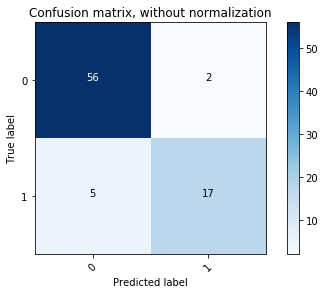

In [15]:
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=list(set(y_train)),
                      title='Confusion matrix, without normalization')
plt.show()

<h3>Not Bad!</h3>

<p>Got Better results this time!</p>


In [16]:
print("Precision: {}".format(precision_score(y_test, y_pred)*100))

Precision: 89.47368421052632
